In [1]:
import tensorflow as tf
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,Input
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [2]:
data_dir = 'imagefolder'

In [3]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [4]:
for category in os.listdir(data_dir): 
    for filename in os.listdir(os.path.join(data_dir, category)):
        image_path = os.path.join(data_dir, category, filename)
        try: 
            img = cv2.imread(image_path)
            tip = Image.open(image_path).format.lower()
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

In [5]:
data = tf.keras.utils.image_dataset_from_directory('imagefolder')

Found 305 files belonging to 2 classes.


In [6]:
data_iterator = data.as_numpy_iterator()

In [7]:
batch = data_iterator.next()

In [8]:
data = data.map(lambda x,y: (x/255, y))

In [9]:
batch = data_iterator.next()

In [10]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [11]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\sudha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [15]:
logdir='logs'

In [16]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [17]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 603ms/step - accuracy: 0.5267 - loss: 1.0585 - val_accuracy: 0.5781 - val_loss: 0.6517
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 592ms/step - accuracy: 0.5390 - loss: 0.6887 - val_accuracy: 0.8438 - val_loss: 0.6385
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 609ms/step - accuracy: 0.7325 - loss: 0.6238 - val_accuracy: 0.8125 - val_loss: 0.5147
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 571ms/step - accuracy: 0.7436 - loss: 0.5304 - val_accuracy: 0.9062 - val_loss: 0.4619
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 575ms/step - accuracy: 0.8439 - loss: 0.4358 - val_accuracy: 0.9375 - val_loss: 0.3447
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 548ms/step - accuracy: 0.8515 - loss: 0.3377 - val_accuracy: 0.8906 - val_loss: 0.3091
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 583ms/step - accuracy: 0.9434 - loss: 0.2602 - val_accuracy: 0.9531 - val_loss: 0.2352
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 582ms/step - accuracy: 0.9361 - loss: 0.2173 - val_accuracy: 0.9688 - val_loss:

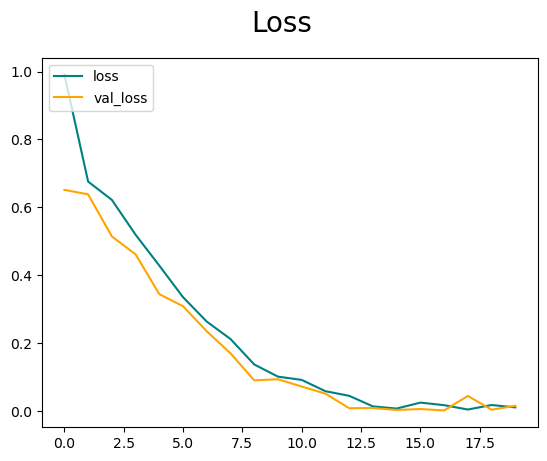

In [18]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

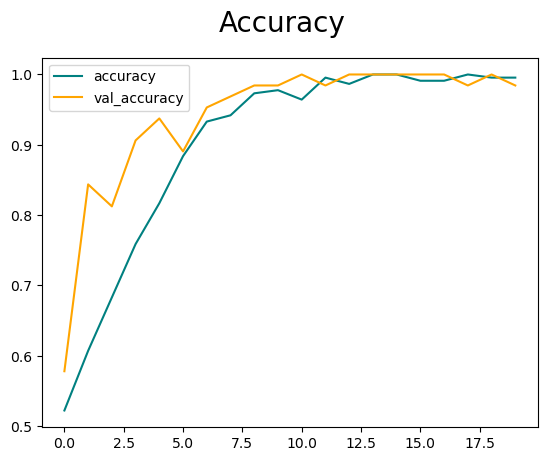

In [19]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [21]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    ans = model.predict(X)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


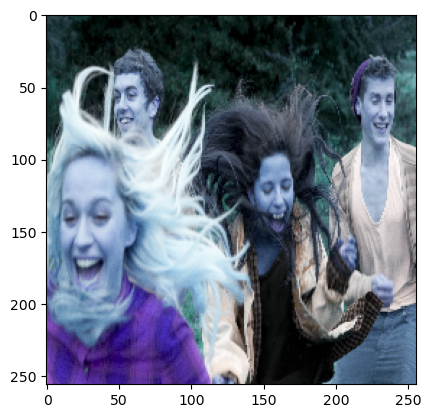

In [23]:
img = cv2.imread('154006829.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))

In [24]:
ans = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [25]:
if ans > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [26]:
from tensorflow.keras.models import load_model


In [28]:
model.save(os.path.join('models','imageclassifier.keras'))

In [ ]:
new_model = load_model('imageclassifier.keras')